✅ Loaded data — Rows: 40946, Columns: 16
✅ Encoded features: 52 columns
✅ Train shape: (32756, 52), Test shape: (8190, 52)
🔎 RMSE: 123,777 €
🔎 R² score: 0.563


/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/2540147081.py:59: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/2540147081.py:60: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("../figures/model_actual_vs_predicted.png")
/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


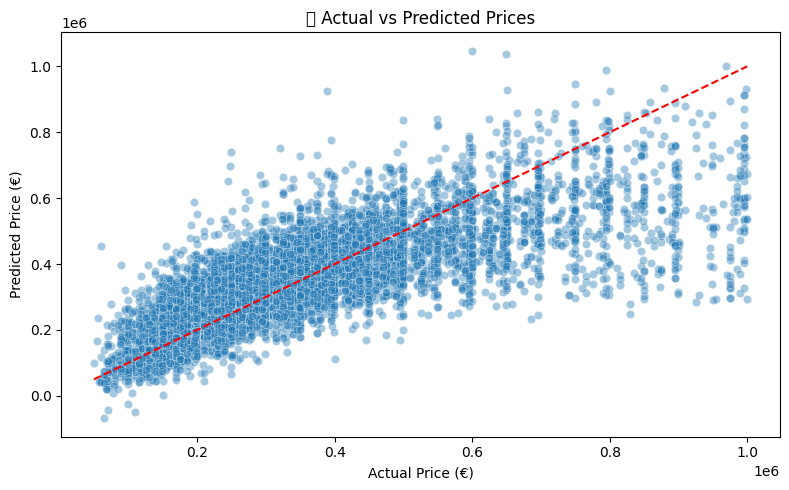

In [27]:
# 💼 Modelling Pipeline: Predicting Property Prices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load Cleaned Data ===
df = pd.read_csv("../data/cleaned_data_mvg.csv")
print(f"✅ Loaded data — Rows: {len(df)}, Columns: {df.shape[1]}")

# === Step 2: Drop Derived Target Leakage Column ===
# We used price_per_m² during EDA, but remove it for training to avoid leakage
if 'price_square_meter' in df.columns:
    df.drop(columns='price_square_meter', inplace=True)

# === Step 3: Feature Selection ===
categorical = ['region', 'province', 'subtype', 'type', 'buildingCondition', 'epcScore']
numerical = ['habitableSurface', 'bedroomCount', 'gardenSurface']
target = 'price'

X = df[categorical + numerical].copy()
y = df[target]

# === Step 4: Encode Categorical Variables ===
X_encoded = pd.get_dummies(X, columns=categorical, drop_first=True)
print(f"✅ Encoded features: {X_encoded.shape[1]} columns")

# === Step 5: Split Train/Test Sets ===
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# === Step 6: Train Linear Regression ===
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === Step 7: Evaluate the Model ===
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"🔎 RMSE: {rmse:,.0f} €")
print(f"🔎 R² score: {r2:.3f}")

# === Step 8: Actual vs Predicted Plot ===
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("📉 Actual vs Predicted Prices")
plt.tight_layout()
plt.savefig("../figures/model_actual_vs_predicted.png")
plt.show()


✅ Data loaded — shape: (40946, 16)

📊 Evaluation on log-transformed model:
MAE:  €91,613
RMSE: €137,891
R²:   0.458


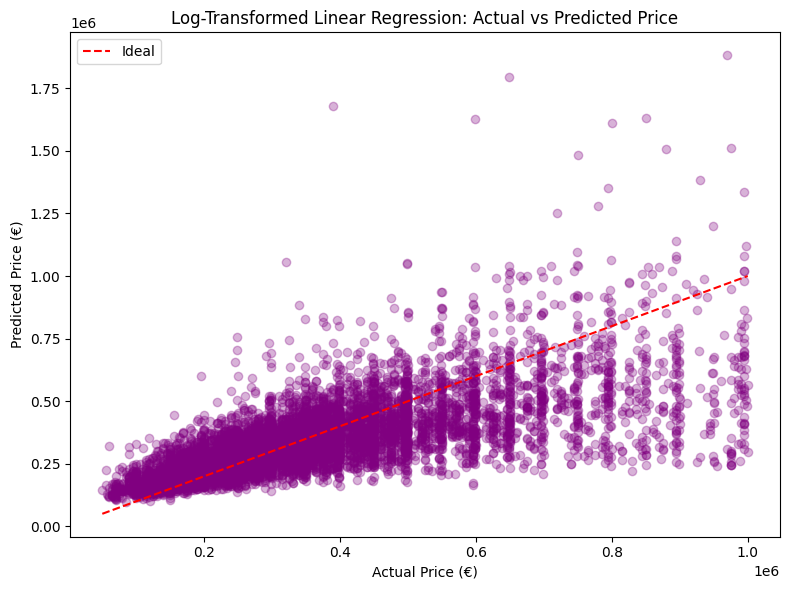

In [28]:
# === Log-Transformed Linear Regression Model ===
# This block:
# 1. Loads the cleaned dataset
# 2. Drops unencoded categorical and text columns
# 3. Applies log-transform to the price for better linear behaviour
# 4. Trains a linear regression model
# 5. Evaluates model performance
# 6. Plots actual vs predicted prices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# === 1. LOAD DATA ===
df = pd.read_csv("../data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. PREPARE FEATURES & LOG-TRANSFORMED TARGET ===

# Drop columns that shouldn't be part of model training:
# - 'price': our target
# - 'price_square_meter': derived from price (would cause leakage)
# - 'locality': still unencoded text
features = df.drop(columns=["price", "price_square_meter", "locality"])

# Define input features (X) and target (y, log-transformed price)
X = features
y = np.log(df["price"])

# === 3. SPLIT INTO TRAIN & TEST ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. TRAIN THE MODEL ===
model = LinearRegression()
model.fit(X_train, y_train)

# === 5. PREDICT AND INVERSE TRANSFORM ===
y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log)  # inverse log
y_true = np.exp(y_test)      # inverse log

# === 6. EVALUATE MODEL ===
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

r2 = r2_score(y_true, y_pred)

print("\n📊 Evaluation on log-transformed model:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")

# === 7. PLOT PREDICTED VS ACTUAL ===
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.3, color="purple")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--", label="Ideal")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Log-Transformed Linear Regression: Actual vs Predicted Price")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/model_logreg_actual_vs_predicted.png")
plt.show()



✅ Data loaded — shape: (40946, 16)

📊 Ridge Regression Evaluation:
MAE:  €91,612
RMSE: €137,891
R²:   0.458


/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/1351311752.py:54: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/1351311752.py:55: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.savefig("../figures/ridge_actual_vs_predicted.png")
/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


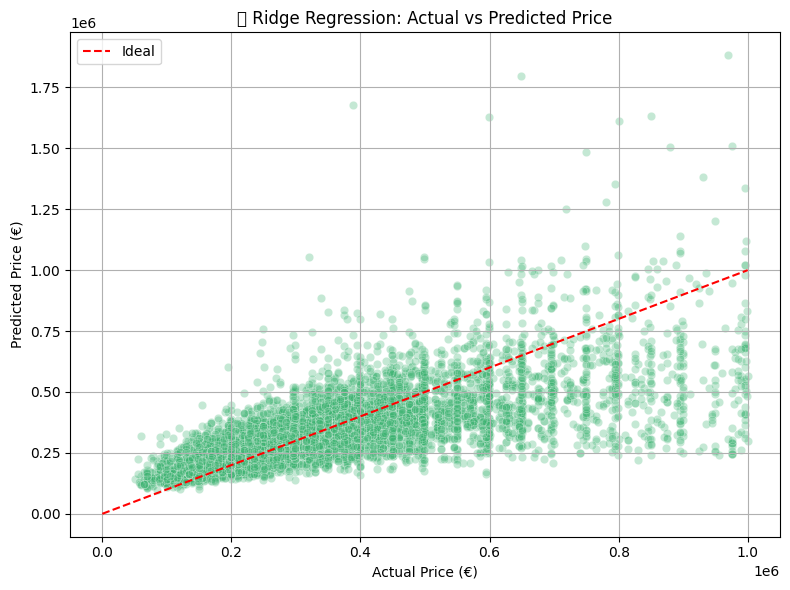

In [29]:
# === Ridge Regression on Log-Transformed Price ===
# Goal: Improve linear regression by applying L2 regularisation (Ridge)
# Motivation: Regularisation helps control overfitting and handles multicollinearity

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === 1. Load data ===
df = pd.read_csv("../data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. Prepare features & log-transformed target ===
# Drop non-numeric columns and unneeded fields
X = df.drop(columns=["price", "price_square_meter", "locality"])
y = np.log(df["price"])  # log-transform target

# === 3. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. Train Ridge model ===
ridge = Ridge(alpha=1.0)  # alpha is the regularisation strength
ridge.fit(X_train, y_train)

# === 5. Predict on test set ===
y_pred_log = ridge.predict(X_test)
y_pred = np.exp(y_pred_log)  # back to normal scale
y_true = np.exp(y_test)

# === 6. Evaluate model ===
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Manual RMSE
r2 = r2_score(y_true, y_pred)

print("\n📊 Ridge Regression Evaluation:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")

# === 7. Plot actual vs predicted ===
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.3, color="mediumseagreen", edgecolors="w", linewidth=0.5)
plt.plot([0, 1_000_000], [0, 1_000_000], color="red", linestyle="--", label="Ideal")
plt.title("🏠 Ridge Regression: Actual vs Predicted Price")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/ridge_actual_vs_predicted.png")
plt.show()


✅ Data loaded — shape: (40946, 16)

🌲 Random Forest Evaluation:
MAE:  €67,307
RMSE: €97,779
R²:   0.727


/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/2186670065.py:53: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/2186670065.py:54: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.savefig("../figures/random_forest_actual_vs_predicted.png")
/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


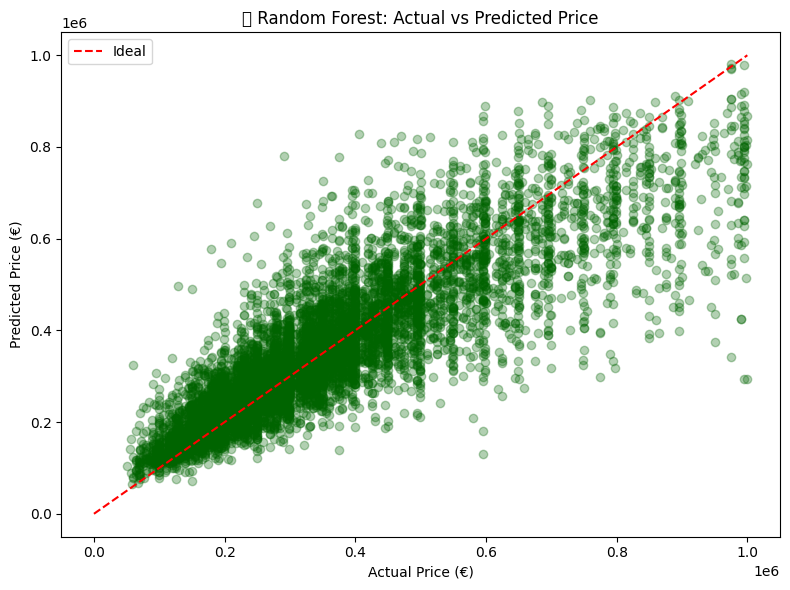

In [30]:
# 🐘 RANDOM FOREST REGRESSION MODEL
# ---------------------------------
# This block loads your cleaned dataset, splits it into training and test sets,
# fits a Random Forest Regressor (non-linear model), and evaluates its performance.
# It also plots actual vs predicted prices for visual inspection.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === 1. LOAD CLEANED DATA ===
df = pd.read_csv("../data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. PREPARE FEATURES & TARGET ===
# Drop raw target & unused columns (categorical strings not encoded)
features = df.drop(columns=["price", "price_square_meter", "locality", "province"])
X = features
y = df["price"]

# === 3. TRAIN-TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. TRAIN RANDOM FOREST MODEL ===
model = RandomForestRegressor(n_estimators=100, max_depth=25, random_state=42)
model.fit(X_train, y_train)

# === 5. PREDICT & EVALUATE ===
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n🌲 Random Forest Evaluation:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")

# === 6. PLOT PREDICTIONS ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='darkgreen')
plt.plot([0, 1e6], [0, 1e6], 'r--', label="Ideal")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("🌲 Random Forest: Actual vs Predicted Price")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/random_forest_actual_vs_predicted.png")
plt.show()


/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/154085636.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(15), x="Importance", y="Feature", palette="viridis")
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/154085636.py:24: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/154085636.py:25: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.savefig("../figures/random_forest_feature_importance.png")
/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


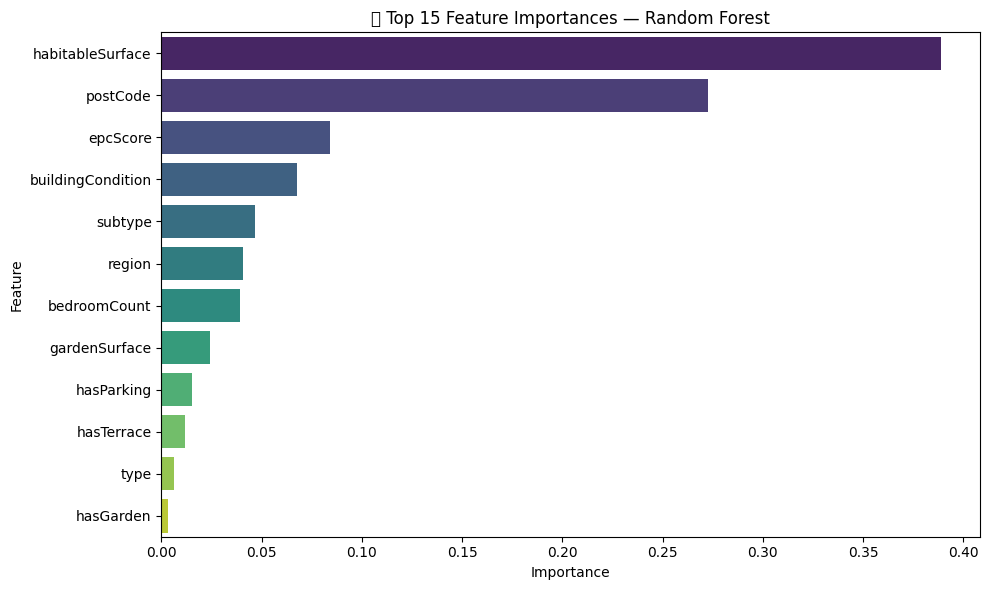

🔝 Top 5 features:
              Feature  Importance
4   habitableSurface    0.388868
3           postCode    0.272510
9           epcScore    0.083893
5  buildingCondition    0.067658
1            subtype    0.046556


In [31]:
# === Feature Importance Plot for Random Forest ===

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume `model` is your trained RandomForestRegressor
# and `X_train` was the DataFrame used for training

# 1. Get feature importances and corresponding names
importances = model.feature_importances_
feature_names = X_train.columns

# 2. Create a DataFrame for easy sorting/plotting
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("🌟 Top 15 Feature Importances — Random Forest")
plt.tight_layout()
plt.savefig("../figures/random_forest_feature_importance.png")
plt.show()

# Optional: print top 5 for terminal visibility
print("🔝 Top 5 features:\n", feat_imp.head(5))


In [44]:
# Tuned previous run of Randomforest
# This version is like saying:
# "Hey model, don’t treat every postcode like a number. Instead, here are 5 price tiers — low to high — based on actual € per m²."
# That means:
#Similar postcodes get grouped → less overfitting
# Small areas with high prices are better captured

# 📦 Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pathlib import Path

cwd = Path.cwd()
print("Current Working Directory:", cwd)


# === 1. LOAD CLEANED DATA ===

df = pd.read_csv("../data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. DROP NON-NUMERIC COLUMNS ===
df = df.drop(columns=["price_square_meter"])

# === 3. DEFINE FEATURES AND TARGET ===
X = df.drop(columns=["price"])
y = df["price"]

# === 4. SPLIT TRAIN/TEST ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 5. HYPERPARAMETER GRID FOR RANDOM FOREST ===
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# === 6. RUN RANDOMIZED SEARCH CV ===
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20, cv=3,
    scoring='neg_mean_absolute_error', random_state=42, verbose=1
)
search.fit(X_train, y_train)
best_rf = search.best_estimator_

# === 7. PREDICT AND EVALUATE ===
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# === 8. PLOT ACTUAL VS PREDICTED ===
plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='darkgreen')
plt.plot([0, 1_000_000], [0, 1_000_000], 'r--', label="Ideal")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("🔍 Tuned Random Forest: Actual vs Predicted Price")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/rf_tuned_actual_vs_predicted.png")
plt.show()

# === 9. PRINT SCORES AND BEST PARAMETERS ===
print("\n📊 Tuned Random Forest Evaluation:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")
print("\n🔧 Best Parameters:", search.best_params_)


Current Working Directory: /Users/Marc/Documents/GitHub/challenge-regression/marc
✅ Data loaded — shape: (40854, 15)
Fitting 3 folds for each of 20 candidates, totalling 60 fits


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 359, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/pandas/core/generic.py", line 2168, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'HOUSE'

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 359, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/pandas/core/generic.py", line 2168, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'TOWN_HOUSE'


📁 Current Working Directory: /Users/Marc/Documents/GitHub/challenge-regression/marc
✅ Data loaded — shape: (40854, 15)


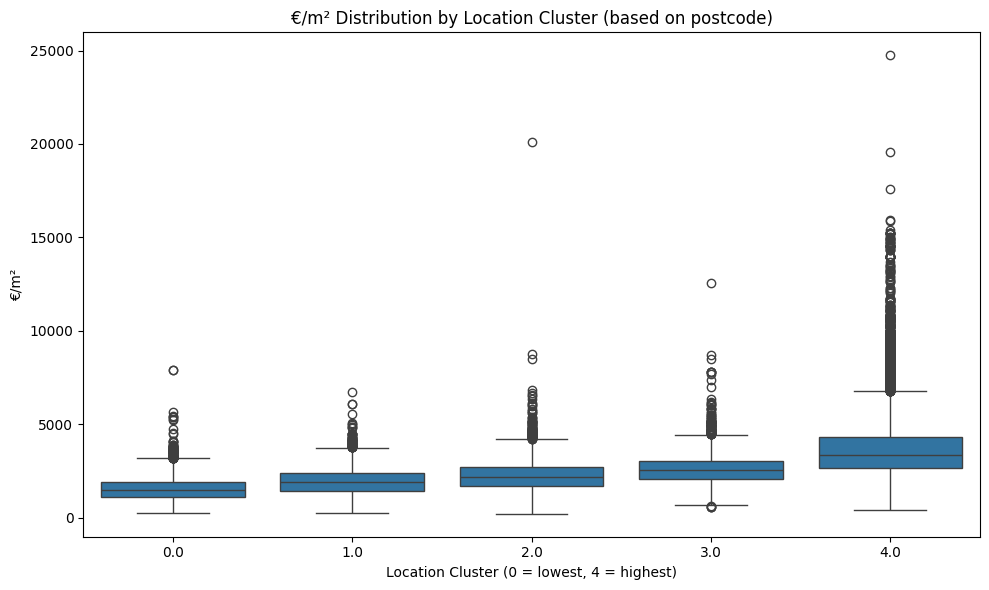

✅ File saved with `location_cluster` added to: data/cleaned_data_mvg2.csv


In [ ]:
# 📍 Create Location-Based Clusters to Improve Modelling
# Objective:
# - Replace raw postcodes (high-cardinality, noisy) with grouped location clusters
# - Group postcodes based on their average price per square metre
# - This simplifies location effects and helps models generalise better
# - Output: new 'location_cluster' column to be added to training data
# Goal:
# Group postcodes into 5 location clusters based on average €/m², to:
# -reduce postcode noise,
# -better reflect local price differences, and
# -improve model performance when used as a feature.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Show current working directory (for debugging)
print("📁 Current Working Directory:", os.getcwd())

# 2. Load the cleaned dataset (make sure this path is correct relative to notebook/script)
df = pd.read_csv("../data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# 3. Compute average €/m² and number of listings per postcode
postcode_stats = df.groupby("postCode")["price_square_meter"].agg(["count", "mean"]).reset_index()
postcode_stats.columns = ["postCode", "count", "avg_price_per_m2"]

# 4. Filter out postcodes with too few listings (e.g. < 20) to reduce noise
postcode_stats = postcode_stats[postcode_stats["count"] >= 20]

# 5. Create 5 location clusters using quantiles (0 = low €/m², 4 = high €/m²)
postcode_stats["location_cluster"] = pd.qcut(postcode_stats["avg_price_per_m2"], q=5, labels=False)

# 6. Merge cluster label back into the main DataFrame
df = df.merge(postcode_stats[["postCode", "location_cluster"]], on="postCode", how="left")

# 7. Plot cluster quality (optional)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="location_cluster", y="price_square_meter")
plt.title("€/m² Distribution by Location Cluster (based on postcode)")
plt.ylabel("€/m²")
plt.xlabel("Location Cluster (0 = lowest, 4 = highest)")
plt.tight_layout()
plt.savefig("../figures/eda_location_clusters.png")  # Save plot
plt.show()

# 8. 🔄 OVERWRITE CLEANED FILE so next step can use it directly...
df.to_csv("../data/cleaned_data_mvg2.csv", index=False)
print("✅ File saved with `location_cluster` added to: data/cleaned_data_mvg2.csv")



Fitting 3 folds for each of 5 candidates, totalling 15 fits

📊 Tuned RF with Imputation:
MAE:  €64,264
RMSE: €96,193
R²:   0.738


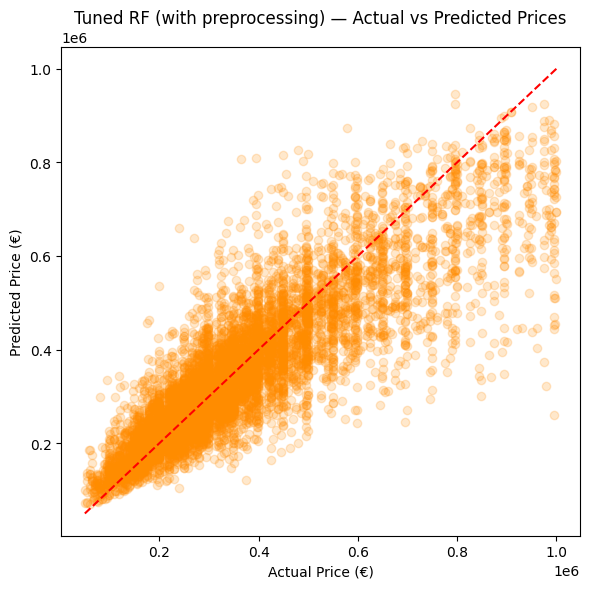

In [61]:
# Updated pipeline for Random Forest with preprocessing
# Goal:
# - Handle categorical and numerical data
# - Impute missing values
# - One-hot encode categorical features
# - Train a tuned RandomForest on log(price)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Load data ===
df = pd.read_csv("../data/cleaned_data_mvg2.csv")
X = df.drop(columns=["price", "price_square_meter"])
y = np.log(df["price"])  # log-transform target

# === 2. Define column types ===
categorical_cols = ["type", "subtype", "province", "region", "buildingCondition", "epcScore", "location_cluster"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# === 3. Define transformers ===
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# === 4. Full preprocessing pipeline ===
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# === 5. Full pipeline ===
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(n_jobs=-1, random_state=42))
])

# === 6. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 7. Define hyperparameter search space ===
param_dist = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

# === 8. Tune with RandomizedSearchCV ===
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1
)

# === 9. Fit search ===
search.fit(X_train, y_train)
best_model = search.best_estimator_

# === 10. Predict and evaluate (inverse log) ===
y_pred_log = best_model.predict(X_test)
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # 🔁 our preferred way
r2 = r2_score(y_true, y_pred)

# === 11. Show results ===
print(f"\n📊 Tuned RF with Imputation:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")

# === 12. Plot actual vs predicted ===
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.2, color="darkorange")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title("Tuned RF (with preprocessing) — Actual vs Predicted Prices")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.tight_layout()
plt.savefig("../figures/tuned_rf_with_imputation.png")
plt.show()


End of Part 1 - Testing moving on with LAsso and Elastic net

✅ Data loaded — shape: (40854, 16)

📊 Lasso Evaluation:
MAE:  €79,861
RMSE: €123,382
R²:   0.578

📊 ElasticNet Evaluation:
MAE:  €79,876
RMSE: €123,439
R²:   0.578


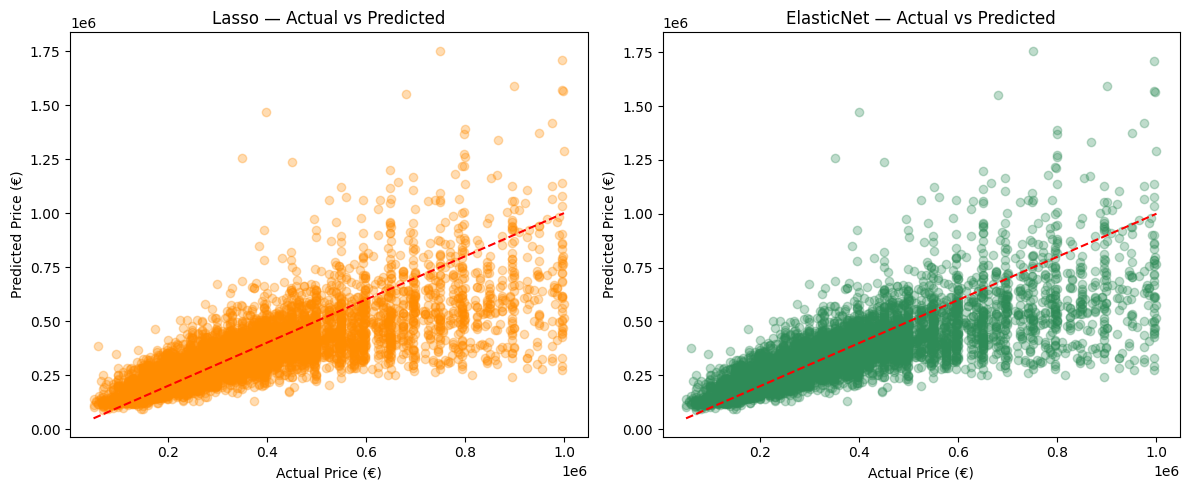

In [62]:
"""
🔍 GOAL:
Train and evaluate **Lasso** and **ElasticNet** regression models using:
- Proper preprocessing (scaling + encoding)
- Log-transformed target variable (price)
- Random 80/20 train-test split
- Built-in CV tuning (LassoCV & ElasticNetCV)
- Price prediction evaluation + visualisation

WHY:
- Lasso helps with feature selection (sets some weights to 0)
- ElasticNet combines L1 (Lasso) and L2 (Ridge) for more balanced regularisation
- Log(price) makes the regression task more linear and penalises large errors less

🔧 OUTPUT:
- MAE, RMSE, R² for both models
- Actual vs predicted plots
- Image saved to: ../figures/lasso_elasticnet_comparison.png
"""

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# === 1. LOAD DATA ===
df = pd.read_csv("../data/cleaned_data_mvg2.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. DROP ROWS WITH MISSING location_cluster (this is a new feature) ===
df = df.dropna(subset=["location_cluster"])

# === 3. DEFINE FEATURES AND LOG-TRANSFORM TARGET ===
X = df.drop(columns=["price", "price_square_meter"])  # drop raw target & derived version
y = np.log(df["price"])  # use log(price) for better model performance

# === 4. DEFINE COLUMN TYPES FOR TRANSFORMERS ===
# Categorical: must be OneHotEncoded (not ordinal)
categorical_cols = ["type", "subtype", "province", "region", "buildingCondition", "epcScore"]
# All other columns = numerical (already numeric, scaled later)
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# === 5. SETUP PREPROCESSING PIPELINE ===
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),                        # standardise numeric features
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols) # one-hot encode categoricals
])

# === 6. SPLIT TRAIN/TEST SETS ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 7. LASSO REGRESSION MODEL ===
# LassoCV = cross-validated Lasso with automatic alpha tuning
lasso_pipe = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LassoCV(cv=5, random_state=42, max_iter=5000))  # allow extra iterations for convergence
])
lasso_pipe.fit(X_train, y_train)
y_pred_lasso = np.exp(lasso_pipe.predict(X_test))  # inverse log to get real price
y_true = np.exp(y_test)

# === 8. ELASTICNET REGRESSION MODEL ===
# ElasticNetCV = cross-validated ElasticNet with auto alpha and l1_ratio tuning
enet_pipe = Pipeline([
    ("preprocessing", preprocessor),
    ("model", ElasticNetCV(cv=5, random_state=42, max_iter=5000))
])
enet_pipe.fit(X_train, y_train)
y_pred_enet = np.exp(enet_pipe.predict(X_test))

# === 9. EVALUATION FUNCTION ===
def evaluate(model_name, y_true, y_pred):
    """Print evaluation metrics: MAE, RMSE, R²"""
    print(f"\n📊 {model_name} Evaluation:")
    print(f"MAE:  €{mean_absolute_error(y_true, y_pred):,.0f}")
    print(f"RMSE: €{np.sqrt(mean_squared_error(y_true, y_pred)):,.0f}")  # use sqrt manually
    print(f"R²:   {r2_score(y_true, y_pred):.3f}")

# === 10. PRINT RESULTS ===
evaluate("Lasso", y_true, y_pred_lasso)
evaluate("ElasticNet", y_true, y_pred_enet)

# === 11. PLOTS: Actual vs Predicted ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred_lasso, alpha=0.3, color="darkorange")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title("Lasso — Actual vs Predicted")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")

plt.subplot(1, 2, 2)
plt.scatter(y_true, y_pred_enet, alpha=0.3, color="seagreen")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title("ElasticNet — Actual vs Predicted")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")

plt.tight_layout()
plt.savefig("../figures/lasso_elasticnet_comparison.png")
plt.show()


Part 3 - Based on Yves outcomes, try to repeat successes with our dataset...

[I 2025-06-27 17:02:36,895] A new study created in memory with name: no-name-3625b11f-331e-4495-b369-6ccf2b2011bd



🔍 Tuning CatBoost — All Features


[I 2025-06-27 17:02:43,658] Trial 0 finished with value: 91598.1913940544 and parameters: {'iterations': 524, 'depth': 4, 'learning_rate': 0.12266418582011122, 'l2_leaf_reg': 9.565514940396714, 'random_strength': 0.1589144758498876, 'bagging_temperature': 0.8577000563385746, 'border_count': 135}. Best is trial 0 with value: 91598.1913940544.
[I 2025-06-27 17:02:52,813] Trial 1 finished with value: 92001.74075098165 and parameters: {'iterations': 381, 'depth': 7, 'learning_rate': 0.056240780221878214, 'l2_leaf_reg': 8.284306927486503, 'random_strength': 1.0223520175459802, 'bagging_temperature': 0.4611185022566183, 'border_count': 122}. Best is trial 0 with value: 91598.1913940544.
[I 2025-06-27 17:03:01,119] Trial 2 finished with value: 90472.0343915543 and parameters: {'iterations': 582, 'depth': 5, 'learning_rate': 0.24269327443486774, 'l2_leaf_reg': 9.22988540389203, 'random_strength': 1.7599647312160593, 'bagging_temperature': 0.5108034742643677, 'border_count': 90}. Best is trial 

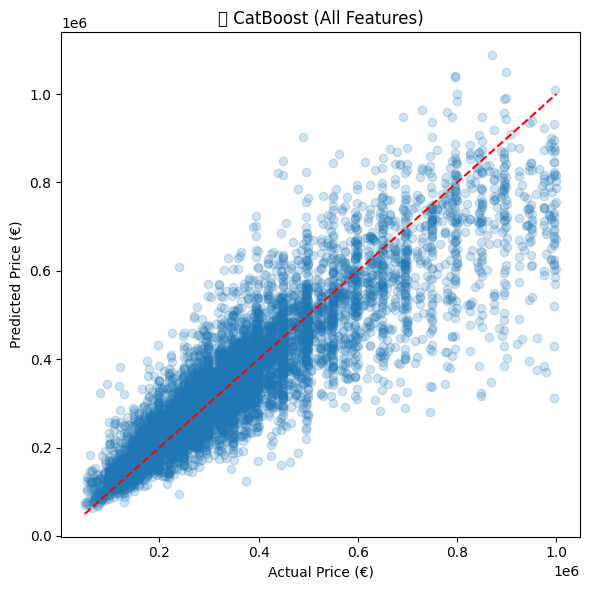

[I 2025-06-27 17:06:12,825] A new study created in memory with name: no-name-c1249a5f-bf33-43a9-b914-45185ce910ef



🔍 Tuning CatBoost — Top Features Only


[I 2025-06-27 17:06:22,601] Trial 0 finished with value: 94582.2283115826 and parameters: {'iterations': 789, 'depth': 6, 'learning_rate': 0.03723316619119625, 'l2_leaf_reg': 7.48377630713318, 'random_strength': 1.0044769855085425, 'bagging_temperature': 0.13773867811909724, 'border_count': 194}. Best is trial 0 with value: 94582.2283115826.
[I 2025-06-27 17:06:42,191] Trial 1 finished with value: 92921.58138093822 and parameters: {'iterations': 647, 'depth': 10, 'learning_rate': 0.09479026086412373, 'l2_leaf_reg': 5.393829565444635, 'random_strength': 0.5189519819284182, 'bagging_temperature': 0.12178167546265906, 'border_count': 131}. Best is trial 1 with value: 92921.58138093822.
[I 2025-06-27 17:06:47,632] Trial 2 finished with value: 93433.13611845714 and parameters: {'iterations': 397, 'depth': 6, 'learning_rate': 0.1359479127748555, 'l2_leaf_reg': 3.4435655012189765, 'random_strength': 1.6540208427468133, 'bagging_temperature': 0.8340369487112612, 'border_count': 168}. Best is t

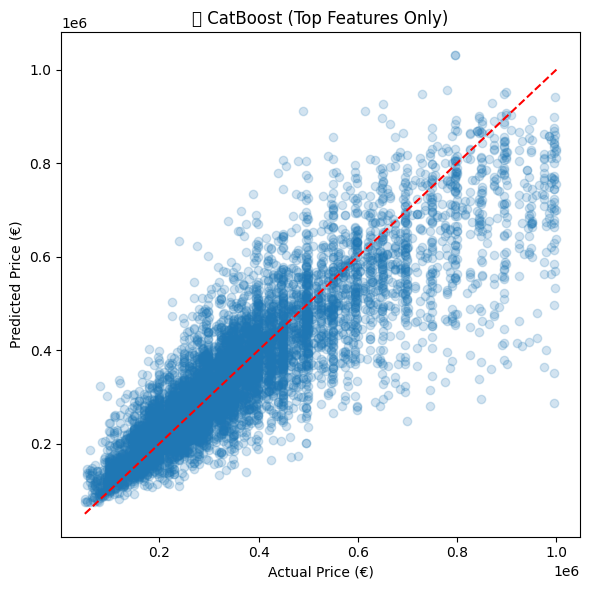


✅ Benchmark Summary:

📊 All Features
MAE:  €59,252
RMSE: €88,832
R²:   0.777

📊 Top Features Only
MAE:  €62,803
RMSE: €92,848
R²:   0.756


In [70]:
# 🧪 Benchmarking CatBoost with Optuna Tuning (All Features vs Top Features)
# Model: CatBoost Regressor (gradient boosting for tabular data, good with categorical features)
# Goal:
# Test the performance of a tuned CatBoost Regressor on our cleaned housing dataset using:
# - All features
# - Only top features (selected from Random Forest importance)
# This helps us evaluate:
# - Whether reducing feature dimensionality improves performance or not.
# - If Optuna-tuned CatBoost generalises better than our previous models.
# Comparison:
#  - Full Feature Set: all columns (including encoded categorical ones)
#  - Top Features Only: manually selected best predictors
# Tuning: Optuna for hyperparameter optimisation
# ➕ Fixes: All categorical features are explicitly cast to string as required by CatBoost
# Evaluation: log-price prediction (inverted for comparison), RMSE, MAE, R²
# Fixes:
# - All categorical features explicitly cast to string (required by CatBoost)
# - Correct handling of train/test split and RMSE
# 
# Study differences !
# rmse = mean_squared_error(y_true, y_pred, squared=False)
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # 🔁 our preferred way
# rmse = np.sqrt(mean_squared_error(np.exp(y_valid), np.exp(preds)))

# ✅ INSTALL IF NOT YET DONE:
# !pip install catboost optuna


import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# === 1. Load data
df = pd.read_csv("../data/cleaned_data_mvg2.csv")
X = df.drop(columns=["price", "price_square_meter"])
y = np.log(df["price"])  # log-transform the target

# === 2. Categorical feature list (for CatBoost)
categorical_cols = [
    "type", "subtype", "province", "region",
    "buildingCondition", "epcScore", "location_cluster"
]

# === 3. Define feature sets
X_all = X.copy()

top_features = [
    "habitableSurface", "postCode", "epcScore",
    "buildingCondition", "subtype", "location_cluster"
]
X_top = X_all[top_features]

# === 4. Objective function (Optuna CV tuning with CatBoost)
def objective(trial, X_data, y_data, cat_cols):
    params = {
        "iterations": trial.suggest_int("iterations", 300, 800),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "random_strength": trial.suggest_float("random_strength", 0.1, 2.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "loss_function": "RMSE",
        "verbose": 0
    }

    model = CatBoostRegressor(**params)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, valid_idx in kf.split(X_data):
        X_train = X_data.iloc[train_idx].copy()
        X_valid = X_data.iloc[valid_idx].copy()
        y_train = y_data.iloc[train_idx]
        y_valid = y_data.iloc[valid_idx]

        for col in cat_cols:
            X_train[col] = X_train[col].astype(str)
            X_valid[col] = X_valid[col].astype(str)

        model.fit(X_train, y_train, cat_features=cat_cols)
        preds = model.predict(X_valid)
        rmse = np.sqrt(mean_squared_error(np.exp(y_valid), np.exp(preds)))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# === 5. Run benchmark
results = []

for version, X_data in [("All Features", X_all), ("Top Features Only", X_top)]:
    print(f"\n🔍 Tuning CatBoost — {version}")
    cat_in_X = [col for col in categorical_cols if col in X_data.columns]

    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective(trial, X_data, y, cat_in_X), n_trials=15)

    best_params = study.best_params
    model = CatBoostRegressor(**best_params, loss_function="RMSE", verbose=0)

    X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

    for col in cat_in_X:
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

    model.fit(X_train, y_train, cat_features=cat_in_X)
    y_pred_log = model.predict(X_test)

    y_pred = np.exp(y_pred_log)
    y_true = np.exp(y_test)

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # ✅ valid RMSE
    r2 = r2_score(y_true, y_pred)

    results.append((version, mae, rmse, r2))

    # Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.2)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Price (€)")
    plt.ylabel("Predicted Price (€)")
    plt.title(f"📈 CatBoost ({version})")
    plt.tight_layout()
    plt.savefig(f"../figures/catboost_optuna_{version.replace(' ', '_').lower()}.png")
    plt.show()

# === 6. Summary
print("\n✅ Benchmark Summary:")
for version, mae, rmse, r2 in results:
    print(f"\n📊 {version}")
    print(f"MAE:  €{mae:,.0f}")
    print(f"RMSE: €{rmse:,.0f}")
    print(f"R²:   {r2:.3f}")



[I 2025-06-30 14:23:31,064] A new study created in memory with name: no-name-0a9171b8-6c14-436c-95db-014b28faff2b



🔍 Tuning CatBoost — All Features


[I 2025-06-30 14:23:54,508] Trial 0 finished with value: 90210.83414022524 and parameters: {'iterations': 732, 'depth': 8, 'learning_rate': 0.03551949593766668, 'l2_leaf_reg': 2.571883340088542, 'random_strength': 1.8877452447441323, 'bagging_temperature': 0.437602539448825, 'border_count': 177}. Best is trial 0 with value: 90210.83414022524.
[I 2025-06-30 14:24:06,962] Trial 1 finished with value: 89009.86142550048 and parameters: {'iterations': 788, 'depth': 5, 'learning_rate': 0.22776366458167716, 'l2_leaf_reg': 9.048117252486202, 'random_strength': 0.10247471386230243, 'bagging_temperature': 0.5219377297063277, 'border_count': 248}. Best is trial 1 with value: 89009.86142550048.
[I 2025-06-30 14:24:13,768] Trial 2 finished with value: 90758.60677517642 and parameters: {'iterations': 450, 'depth': 5, 'learning_rate': 0.16655339534999147, 'l2_leaf_reg': 4.929022740648372, 'random_strength': 0.42243575978038705, 'bagging_temperature': 0.2805905576432638, 'border_count': 112}. Best is 

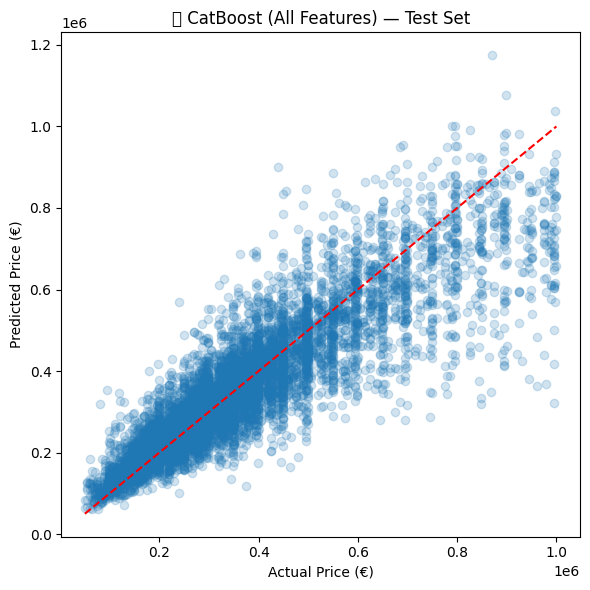

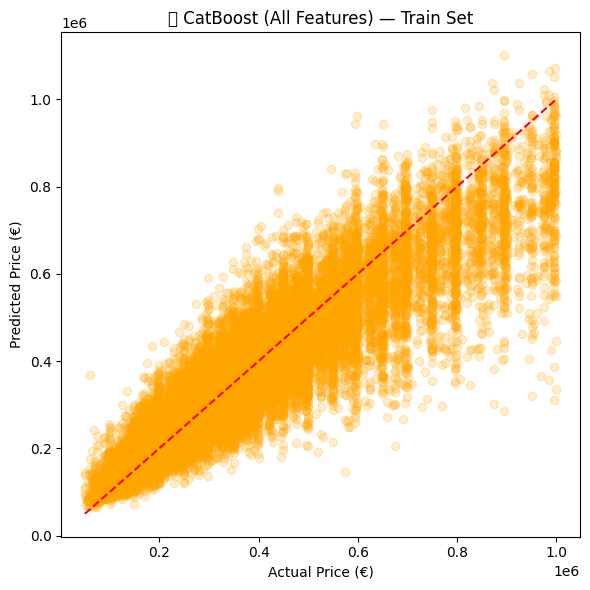

[I 2025-06-30 14:27:21,859] A new study created in memory with name: no-name-ff86871d-4521-4f4c-9cbf-5555d7ab8557



🔍 Tuning CatBoost — Top Features Only


[I 2025-06-30 14:27:31,232] Trial 0 finished with value: 93778.95762643799 and parameters: {'iterations': 614, 'depth': 6, 'learning_rate': 0.16507860230592103, 'l2_leaf_reg': 8.404466002660921, 'random_strength': 1.229675251262725, 'bagging_temperature': 0.7721167929588749, 'border_count': 92}. Best is trial 0 with value: 93778.95762643799.
[I 2025-06-30 14:27:35,201] Trial 1 finished with value: 97253.52948004218 and parameters: {'iterations': 401, 'depth': 4, 'learning_rate': 0.048129337896154395, 'l2_leaf_reg': 4.176769268118812, 'random_strength': 1.4388051179664831, 'bagging_temperature': 0.990656906685152, 'border_count': 148}. Best is trial 0 with value: 93778.95762643799.
[I 2025-06-30 14:28:01,346] Trial 2 finished with value: 94230.60672449612 and parameters: {'iterations': 666, 'depth': 9, 'learning_rate': 0.2982013837681806, 'l2_leaf_reg': 6.485610306507007, 'random_strength': 0.5966866828569801, 'bagging_temperature': 0.6113947453698246, 'border_count': 180}. Best is tria

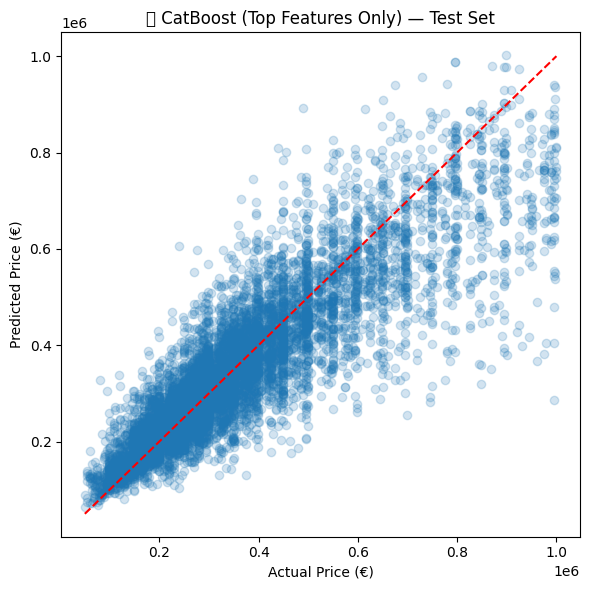

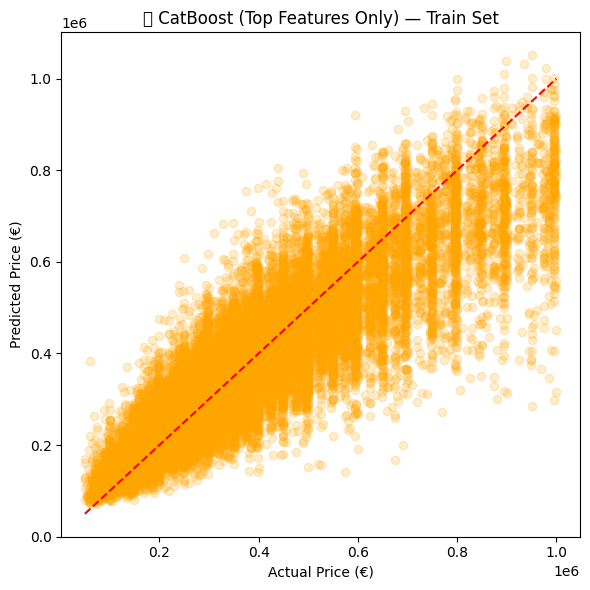


✅ Train vs Test Benchmark Summary:

📊 All Features
Train — MAE: €53,650 | RMSE: €79,068 | R²: 0.820
Test  — MAE: €59,351 | RMSE: €88,834 | R²: 0.777

📊 Top Features Only
Train — MAE: €59,746 | RMSE: €86,923 | R²: 0.782
Test  — MAE: €62,652 | RMSE: €92,873 | R²: 0.756


In [71]:
# 🧪 Benchmarking CatBoost with Optuna Tuning — All Features vs Top Features
# Purpose: Assess whether feature reduction improves performance and evaluate train vs test accuracy.
# Metrics: MAE, RMSE, R² — all calculated on inverse log-transformed prices.
# Includes: Categorical handling, Optuna tuning, visualisation of predictions.

import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# === 1. Load data
df = pd.read_csv("../data/cleaned_data_mvg2.csv")
X = df.drop(columns=["price", "price_square_meter"])
y = np.log(df["price"])

# === 2. Define categorical columns
categorical_cols = [
    "type", "subtype", "province", "region",
    "buildingCondition", "epcScore", "location_cluster"
]

# === 3. Feature sets
X_all = X.copy()
top_features = [
    "habitableSurface", "postCode", "epcScore",
    "buildingCondition", "subtype", "location_cluster"
]
X_top = X_all[top_features]

# === 4. Optuna objective function
def objective(trial, X_data, y_data, cat_cols):
    params = {
        "iterations": trial.suggest_int("iterations", 300, 800),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "random_strength": trial.suggest_float("random_strength", 0.1, 2.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "loss_function": "RMSE",
        "verbose": 0
    }

    model = CatBoostRegressor(**params)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, valid_idx in kf.split(X_data):
        X_train = X_data.iloc[train_idx].copy()
        X_valid = X_data.iloc[valid_idx].copy()
        y_train = y_data.iloc[train_idx]
        y_valid = y_data.iloc[valid_idx]

        for col in cat_cols:
            X_train[col] = X_train[col].astype(str)
            X_valid[col] = X_valid[col].astype(str)

        model.fit(X_train, y_train, cat_features=cat_cols)
        preds = model.predict(X_valid)
        rmse = np.sqrt(mean_squared_error(np.exp(y_valid), np.exp(preds)))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# === 5. Benchmark both versions
results = []

for version, X_data in [("All Features", X_all), ("Top Features Only", X_top)]:
    print(f"\n🔍 Tuning CatBoost — {version}")
    cat_in_X = [col for col in categorical_cols if col in X_data.columns]

    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective(trial, X_data, y, cat_in_X), n_trials=15)
    best_params = study.best_params

    X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
    for col in cat_in_X:
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

    model = CatBoostRegressor(**best_params, loss_function="RMSE", verbose=0)
    model.fit(X_train, y_train, cat_features=cat_in_X)

    # === Evaluate on train
    y_train_pred = np.exp(model.predict(X_train))
    y_train_true = np.exp(y_train)
    mae_train = mean_absolute_error(y_train_true, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
    r2_train = r2_score(y_train_true, y_train_pred)

    # === Evaluate on test
    y_test_pred = np.exp(model.predict(X_test))
    y_test_true = np.exp(y_test)
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2_test = r2_score(y_test_true, y_test_pred)

    results.append({
        "version": version,
        "mae_train": mae_train, "rmse_train": rmse_train, "r2_train": r2_train,
        "mae_test": mae_test, "rmse_test": rmse_test, "r2_test": r2_test
    })

    # === Plots (test)
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test_true, y_test_pred, alpha=0.2)
    plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'r--')
    plt.xlabel("Actual Price (€)")
    plt.ylabel("Predicted Price (€)")
    plt.title(f"📈 CatBoost ({version}) — Test Set")
    plt.tight_layout()
    plt.savefig(f"../figures/catboost_optuna_{version.replace(' ', '_').lower()}_test.png")
    plt.show()

    # === Plots (train)
    plt.figure(figsize=(6, 6))
    plt.scatter(y_train_true, y_train_pred, alpha=0.2, color="orange")
    plt.plot([y_train_true.min(), y_train_true.max()], [y_train_true.min(), y_train_true.max()], 'r--')
    plt.xlabel("Actual Price (€)")
    plt.ylabel("Predicted Price (€)")
    plt.title(f"📉 CatBoost ({version}) — Train Set")
    plt.tight_layout()
    plt.savefig(f"../figures/catboost_optuna_{version.replace(' ', '_').lower()}_train.png")
    plt.show()

# === 6. Results summary
print("\n✅ Train vs Test Benchmark Summary:")
for r in results:
    print(f"\n📊 {r['version']}")
    print(f"Train — MAE: €{r['mae_train']:,.0f} | RMSE: €{r['rmse_train']:,.0f} | R²: {r['r2_train']:.3f}")
    print(f"Test  — MAE: €{r['mae_test']:,.0f} | RMSE: €{r['rmse_test']:,.0f} | R²: {r['r2_test']:.3f}")
